In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Bilan tarification 2019.csv', sep=";", encoding="iso-8859-1")
df

,Id Personne,Id Famille,QF,Type repas,Nombre,id gale ou non,type de repas simplifi par tarif identique
0,1,325,999999,Repas Végétarien,2,NaN,Repas vgtarien
1,2,497,636,Repas Standard,1,NaN,Repas Standard
2,3,762,999999,Repas Standard,1,NaN,Repas Standard
3,4,770,392,Repas Standard,125,oui,Repas Standard
4,4,770,999999,Repas Standard,1,NaN,Repas Standard
...,...,...,...,...,...,...,...
16930,15579,10849,999999,Repas Sans Porc,8,NaN,Repas Standard
16931,15580,10850,999999,Repas Standard,13,NaN,Repas Standard
16932,15581,10851,259,Repas Standard,12,NaN,Repas Standard
16933,15582,10852,620,Repas Standard,14,NaN,Repas Standard


In [3]:
df[['Id Personne', 'Id Famille', 'QF', 'Type repas', 'Nombre']]

,Id Personne,Id Famille,QF,Type repas,Nombre
0,1,325,999999,Repas Végétarien,2
1,2,497,636,Repas Standard,1
2,3,762,999999,Repas Standard,1
3,4,770,392,Repas Standard,125
4,4,770,999999,Repas Standard,1
...,...,...,...,...,...
16930,15579,10849,999999,Repas Sans Porc,8
16931,15580,10850,999999,Repas Standard,13
16932,15581,10851,259,Repas Standard,12
16933,15582,10852,620,Repas Standard,14


In [4]:
df[['Type repas', 'Nombre']].groupby('Type repas').count()

,Nombre
Type repas,
Panier,112
Repas Halal,5544
Repas Sans Porc,1205
Repas Standard,9118
Repas Végétarien,956


In [5]:
df[['Type repas', 'Nombre']].groupby('Type repas').sum()

,Nombre
Type repas,
Panier,7380
Repas Halal,433040
Repas Sans Porc,107789
Repas Standard,894000
Repas Végétarien,61394


In [6]:
np.unique(df['Id Famille'])

array([    1,     2,     3, ..., 10850, 10851, 10852])

In [7]:
df['Repas'] = np.select(
    [
        df["Type repas"].str.contains('Végétarien'),
        df["Type repas"].str.contains('Panier'),
    ],
    [
        'cantine_vegetarien',
        'cantine_panier',
    ],
    default = 'cantine'
)
df

,Id Personne,Id Famille,QF,Type repas,Nombre,id gale ou non,type de repas simplifi par tarif identique,Repas
0,1,325,999999,Repas Végétarien,2,NaN,Repas vgtarien,cantine_vegetarien
1,2,497,636,Repas Standard,1,NaN,Repas Standard,cantine
2,3,762,999999,Repas Standard,1,NaN,Repas Standard,cantine
3,4,770,392,Repas Standard,125,oui,Repas Standard,cantine
4,4,770,999999,Repas Standard,1,NaN,Repas Standard,cantine
...,...,...,...,...,...,...,...,...
16930,15579,10849,999999,Repas Sans Porc,8,NaN,Repas Standard,cantine
16931,15580,10850,999999,Repas Standard,13,NaN,Repas Standard,cantine
16932,15581,10851,259,Repas Standard,12,NaN,Repas Standard,cantine
16933,15582,10852,620,Repas Standard,14,NaN,Repas Standard,cantine


In [8]:
df[['Repas', 'Nombre']]

,Repas,Nombre
0,cantine_vegetarien,2
1,cantine,1
2,cantine,1
3,cantine,125
4,cantine,1
...,...,...
16930,cantine,8
16931,cantine,13
16932,cantine,12
16933,cantine,14


In [9]:
df[['Repas', 'Nombre']].groupby('Repas').count()

,Nombre
Repas,
cantine,15867
cantine_panier,112
cantine_vegetarien,956


In [10]:
df[['Repas', 'Nombre']].groupby('Repas').sum()

,Nombre
Repas,
cantine,1434829
cantine_panier,7380
cantine_vegetarien,61394


In [11]:
import matplotlib.pyplot as plt

(array([  956.,     0.,     0.,     0.,     0., 15867.,     0.,     0.,
            0.,   112.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

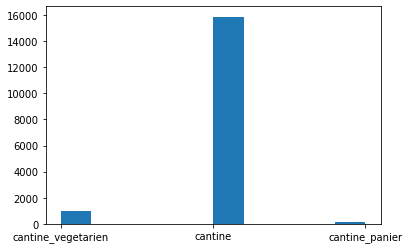

In [12]:
plt.hist(df[['Repas']])

(array([  61394.,       0.,       0.,       0.,       0., 1434829.,
              0.,       0.,       0.,    7380.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

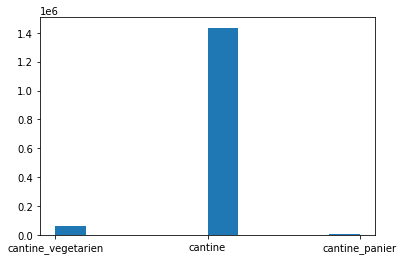

In [13]:
plt.hist(df[['Repas']], weights = df[['Nombre']])

In [14]:
df.QF

0        999999
1           636
2        999999
3           392
4        999999
          ...  
16930    999999
16931    999999
16932       259
16933       620
16934       620
Name: QF, Length: 16935, dtype: int64

In [15]:
np.unique(df.QF)

array([     1,      3,     13, ...,  13591,  13939, 999999])

(array([15859.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1076.]),
 array([1.000000e+00, 1.000008e+05, 2.000006e+05, 3.000004e+05,
        4.000002e+05, 5.000000e+05, 5.999998e+05, 6.999996e+05,
        7.999994e+05, 8.999992e+05, 9.999990e+05]),
 <BarContainer object of 10 artists>)

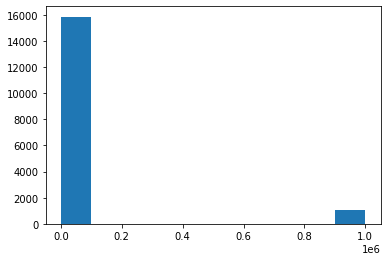

In [16]:
plt.hist(df.QF)

(array([7225., 4943., 2032., 1034.,  319.,  135.,   53.,   42.,   24.,
          14.]),
 array([1.000e+00, 5.730e+02, 1.145e+03, 1.717e+03, 2.289e+03, 2.861e+03,
        3.433e+03, 4.005e+03, 4.577e+03, 5.149e+03, 5.721e+03]),
 <BarContainer object of 10 artists>)

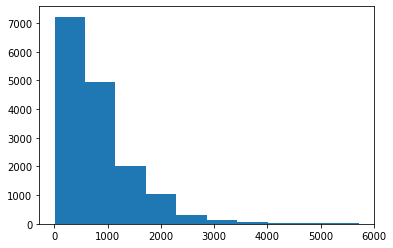

In [17]:
plt.hist(df.QF[df.QF< 6000])

(array([0.03842993, 0.04108463, 0.0523355 , 0.06150054, 0.10309083,
        0.16528664, 0.2526389 , 0.33632514, 0.40117565, 0.45667151,
        0.51400038, 0.5717717 , 0.61873459, 0.65267682, 0.67846533,
        0.700335  , 0.71853865, 0.73699513, 0.75210164, 0.76910435,
        0.7845901 , 0.80190886, 0.81701536, 0.82940396, 0.84141331,
        0.85582454, 0.86796031, 0.87978004, 0.88730169, 0.89754124,
        0.90803363, 0.91637697, 0.92440427, 0.93116744, 0.93856267,
        0.94374565, 0.94918147, 0.95423804, 0.95916819, 0.96289741,
        0.9654257 , 0.96763795, 0.97029265, 0.9725049 , 0.97433791,
        0.97636053, 0.97850958, 0.98034258, 0.98173314, 0.98306049,
        0.9840086 , 0.98476708, 0.98558877, 0.98660009, 0.98729537,
        0.9884331 , 0.98957082, 0.99039252, 0.99102459, 0.99159345,
        0.99178307, 0.99241514, 0.99279439, 0.99298401, 0.99330004,
        0.99355287, 0.99393212, 0.99462739, 0.99481702, 0.99494343,
        0.99532267, 0.99563871, 0.99582833, 0.99

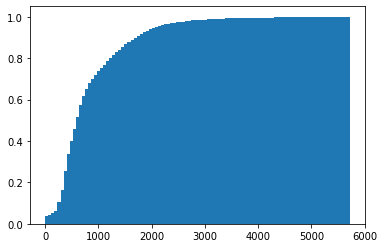

In [18]:
plt.hist(df.QF[df.QF< 6000], density=True, bins=100, cumulative=True)

(array([0.04195181, 0.04483239, 0.05696095, 0.06635117, 0.11023017,
        0.17319098, 0.26119613, 0.34131084, 0.40099958, 0.45050525,
        0.50212118, 0.55444405, 0.59858076, 0.62947217, 0.65441371,
        0.67424118, 0.69188164, 0.70861448, 0.72304343, 0.74127747,
        0.75697102, 0.77477765, 0.79041699, 0.80376088, 0.81713081,
        0.83317361, 0.84699701, 0.85961001, 0.86758072, 0.8792178 ,
        0.89129356, 0.90119216, 0.91018384, 0.91790387, 0.92576755,
        0.93119425, 0.93778416, 0.94408186, 0.95019367, 0.95480147,
        0.9579137 , 0.96056403, 0.96385512, 0.96653995, 0.96881427,
        0.97131814, 0.97371006, 0.97601889, 0.97767288, 0.97913253,
        0.98029293, 0.98133433, 0.98234334, 0.98355937, 0.98442333,
        0.985971  , 0.98736306, 0.98836573, 0.98905859, 0.98981905,
        0.99007957, 0.99089777, 0.99141882, 0.99150965, 0.99188495,
        0.9922511 , 0.99281862, 0.99358542, 0.99384031, 0.99392832,
        0.99439375, 0.9948634 , 0.99513942, 0.99

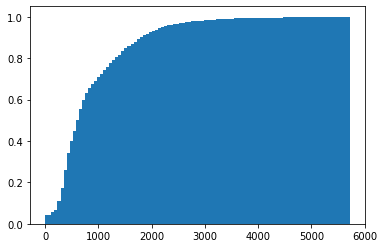

In [19]:
plt.hist(df.QF[df.QF< 6000], density=True, bins=100, cumulative=True, weights=df.Nombre[df.QF< 6000])

In [20]:
df.QF = np.minimum(df.QF, 99999)

In [21]:
raw_df = pd.pivot_table(df, index=["Id Personne", "Id Famille", "QF"], columns="Repas", values="Nombre", fill_value=0)
raw_df

Repas                         cantine  cantine_panier  cantine_vegetarien
Id Personne Id Famille QF                                                
1           325        99999      0.0               0                   2
2           497        636        1.0               0                   0
3           762        99999      1.0               0                   0
4           770        392      125.0               0                   0
                       99999      1.0               0                   0
...                               ...             ...                 ...
15579       10849      99999      8.0               0                   0
15580       10850      99999     13.0               0                   0
15581       10851      259       12.0               0                   0
15582       10852      620       14.0               0                   0
15583       10852      620       10.0               0                   0

[16657 rows x 3 columns]

In [22]:
flat_df = raw_df.reset_index()
flat_df

Repas,Id Personne,Id Famille,QF,cantine,cantine_panier,cantine_vegetarien
0,1,325,99999,0.0,0,2
1,2,497,636,1.0,0,0
2,3,762,99999,1.0,0,0
3,4,770,392,125.0,0,0
4,4,770,99999,1.0,0,0
...,...,...,...,...,...,...
16652,15579,10849,99999,8.0,0,0
16653,15580,10850,99999,13.0,0,0
16654,15581,10851,259,12.0,0,0
16655,15582,10852,620,14.0,0,0


In [23]:
familles_ids = flat_df["Id Famille"] * 100000 + flat_df.QF
familles_ids

0          32599999
1          49700636
2          76299999
3          77000392
4          77099999
            ...    
16652    1084999999
16653    1085099999
16654    1085100259
16655    1085200620
16656    1085200620
Length: 16657, dtype: int64

In [24]:
(unique_famille_ids, famille_idx, famille_id_inv) = np.unique(familles_ids, return_index=True, return_inverse=True)
unique_famille_ids, famille_idx, famille_id_inv

(array([    100301,     200455,     300601, ..., 1085099999, 1085100259,
        1085200620], dtype=int64),
 array([14700,  4244,  3271, ..., 16653, 16654, 16655]),
 array([  334,   514,   786, ..., 11608, 11609, 11609]))

In [25]:
unique_famille_ids

array([    100301,     200455,     300601, ..., 1085099999, 1085100259,
       1085200620], dtype=int64)

In [26]:
individu_df = pd.DataFrame({
    'famille_id': famille_id_inv,
    'strasbourg_metropole_nombre_repas_cantine':flat_df.cantine,
    'strasbourg_metropole_nombre_repas_cantine_vegetarien':flat_df.cantine_vegetarien,
    'strasbourg_metropole_nombre_repas_cantine_panier':flat_df.cantine_panier,
})
individu_df

,famille_id,strasbourg_metropole_nombre_repas_cantine,strasbourg_metropole_nombre_repas_cantine_vegetarien,strasbourg_metropole_nombre_repas_cantine_panier
0,334,0.0,2,0
1,514,1.0,0,0
2,786,1.0,0,0
3,794,125.0,0,0
4,795,1.0,0,0
...,...,...,...,...
16652,11606,8.0,0,0
16653,11607,13.0,0,0
16654,11608,12.0,0,0
16655,11609,14.0,0,0


In [27]:
famille_df = pd.DataFrame({
    'strasbourg_metropole_quotient_familial': flat_df.QF[famille_idx]
})
famille_df

,strasbourg_metropole_quotient_familial
14700,301
4244,455
3271,601
2796,787
12016,244
...,...
16651,99999
7453,99999
16653,99999
16654,259


In [28]:
base_year = "2021-03"

In [29]:
from openfisca_survey_manager.scenarios import AbstractSurveyScenario
from openfisca_france import CountryTaxBenefitSystem
from openfisca_france.model.base import Famille, FoyerFiscal, Menage
from openfisca_core import periods

In [30]:
class StrasbourgSurveyScenario(AbstractSurveyScenario):
    def __init__(self, data = None):
        super(StrasbourgSurveyScenario, self).__init__()

        tax_benefit_system = CountryTaxBenefitSystem()
        tax_benefit_system.load_extension('openfisca_france_local')
        self.year = base_year

        if 'input_data_frame_by_entity_by_period' in data:
            period = periods.period(self.year)
            dataframe_variables = set()
            for entity_dataframe in data['input_data_frame_by_entity_by_period'][period].values():
                if not isinstance(entity_dataframe, pd.DataFrame):
                    continue
                dataframe_variables = dataframe_variables.union(set(entity_dataframe.columns))
            self.used_as_input_variables = list(
                set(tax_benefit_system.variables.keys()).intersection(dataframe_variables)
                )

        self.set_tax_benefit_systems(tax_benefit_system)
        self.init_from_data(data = data)

In [31]:
individu_df['famille_role_index'] = 0
individu_df['foyer_fiscal_id'] = individu_df.famille_id
individu_df['foyer_fiscal_role_index'] = 0
individu_df['menage_id'] = individu_df.famille_id
individu_df['menage_role_index'] = 0

In [32]:
menage_df = pd.DataFrame({})
foyerfiscaux_df = pd.DataFrame({})

In [33]:
periods.period(base_year)

Period(('month', Instant((2021, 3, 1)), 1))

In [34]:
data = dict(input_data_frame_by_entity_by_period = {periods.period(base_year): dict(
individu=individu_df,
famille=famille_df,
menage=menage_df,
foyer_fiscal=foyerfiscaux_df)})

In [35]:
scenario = StrasbourgSurveyScenario(data = data)

In [36]:
tarif_cantine = scenario.simulation.calculate('strasbourg_metropole_tarification_cantine', period = '2021-03')
tarif_cantine

array([1.5 , 2.15, 2.7 , ..., 6.9 , 1.5 , 2.7 ], dtype=float32)

In [37]:
cout_cantine = scenario.simulation.calculate('strasbourg_metropole_cout_cantine', period = '2021-03')
cout_cantine

array([138.      ,  83.850006, 135.      , ...,  89.700005,  18.      ,
        64.8     ], dtype=float32)

In [38]:
sum(cout_cantine)

5405664.2929914

In [39]:
cout_cantine_vege = scenario.simulation.calculate('strasbourg_metropole_cout_cantine_repas_vegetarien', period = '2021-03')
cout_cantine_vege

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [40]:
sum(cout_cantine_vege)

187197.99897646904

In [41]:
cout_cantine_panier = scenario.simulation.calculate('strasbourg_metropole_cout_cantine_repas_panier', period = '2021-03')
cout_cantine_panier

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [43]:
sum(cout_cantine_panier)

NameError: name 'cout_cantine_panier' is not defined

In [44]:
len(cout_cantine)

11610

In [45]:
flat_df

Repas,Id Personne,Id Famille,QF,cantine,cantine_panier,cantine_vegetarien
0,1,325,99999,0.0,0,2
1,2,497,636,1.0,0,0
2,3,762,99999,1.0,0,0
3,4,770,392,125.0,0,0
4,4,770,99999,1.0,0,0
...,...,...,...,...,...,...
16652,15579,10849,99999,8.0,0,0
16653,15580,10850,99999,13.0,0,0
16654,15581,10851,259,12.0,0,0
16655,15582,10852,620,14.0,0,0
